<a href="https://colab.research.google.com/github/amplabs-ai/amplabs/blob/main/MRS_Sandia_AmpLabs_Example_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MRS - Sandia AmpLabs Example 2



In [ ]:
# Download python packages to your system using pip install
import sys
!{sys.executable} -m pip install pandas pybamm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 28.0 MB/s 
     |████████████████████████████████| 34.2 MB 1.5 MB/s 
     |████████████████████████████████| 41 kB 699 kB/s 
     |████████████████████████████████| 144 kB 14.3 MB/s 
     |████████████████████████████████| 561 kB 43.0 MB/s 
     |████████████████████████████████| 67 kB 5.5 MB/s 
     |████████████████████████████████| 6.4 MB 43.7 MB/s 
     |████████████████████████████████| 3.4 MB 36.5 MB/s 
     |████████████████████████████████| 3.1 MB 37.1 MB/s 
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: sympy
    Found existing installation: sympy 1.7.1
    Uninstalling sympy-1.7.1:
      Successfully uninstalled sympy-1.7.1
  Attempting uninstall: imageio
    Found existing installation: imageio 2.4.1
    

In [ ]:
#suppressing warnings in Jupyter Notebooks
import warnings
warnings.filterwarnings('ignore')

# Useful for fetching data from the web 
import json
import urllib.error
import urllib.request

# PyData Libraries
import pandas as pd

# Define Helper Function

In [ ]:
def get_amplabs_data(cell_id):
    url = "https://www.amplabs.ai/download/cells/cycle_data_json?cell_id={}".format(cell_id.replace('/', '%2F'))
    user_token = "<token>"
    httprequest = urllib.request.Request(
            url, method="GET"
        )
    httprequest.add_header("Authorization", "Bearer {}".format(user_token))

    try:
        with urllib.request.urlopen(httprequest) as httpresponse:
            response = json.loads(httpresponse.read())
            return response
    except urllib.error.HTTPError as e:
        print(e)
    return None

In [ ]:
#Fetch Data from Amplabs API
cell_id = "SNL_18650_NMC_15C_0-100_0.5/1C_a"
response = get_amplabs_data(cell_id)

if response:
    df_exp = pd.DataFrame(response['records'][0])
    print("Process complete", df_exp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Charge_Capacity (Ah)     512 non-null    float64
 1   Charge_Energy (Wh)       512 non-null    float64
 2   Cycle_Index              512 non-null    int64  
 3   Discharge_Capacity (Ah)  512 non-null    float64
 4   Discharge_Energy (Wh)    512 non-null    float64
 5   End_Time                 0 non-null      object 
 6   Max_Current (A)          512 non-null    float64
 7   Max_Voltage (V)          512 non-null    float64
 8   Min_Current (A)          512 non-null    float64
 9   Min_Voltage (V)          512 non-null    float64
 10  Start_Time               0 non-null      object 
 11  Test_Time (s)            512 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 48.1+ KB
Process complete None


In [ ]:
df_exp

,Charge_Capacity (Ah),Charge_Energy (Wh),Cycle_Index,Discharge_Capacity (Ah),Discharge_Energy (Wh),End_Time,Max_Current (A),Max_Voltage (V),Min_Current (A),Min_Voltage (V),Start_Time,Test_Time (s)
0,2.559,10.015,1,2.697,9.400,None,1.496,4.200,-1.503,1.999,None,14644.703
1,2.701,10.485,2,2.697,9.408,None,1.496,4.200,-1.503,1.999,None,29574.640
2,2.697,10.466,3,2.691,9.392,None,1.496,4.200,-1.503,1.999,None,44480.050
3,5.359,20.802,4,5.331,17.928,None,1.496,4.200,-3.003,1.998,None,67105.681
4,2.661,10.316,5,2.652,8.927,None,1.496,4.200,-3.003,1.999,None,78058.660
...,...,...,...,...,...,...,...,...,...,...,...,...
507,1.594,6.326,509,1.591,5.306,None,1.496,4.200,-3.003,1.998,None,4542646.352
508,1.590,6.313,510,1.627,5.721,None,1.496,4.200,-1.503,1.998,None,4552425.505
509,1.619,6.446,511,1.629,5.732,None,1.496,4.200,-1.503,1.998,None,4562265.763
510,1.626,6.474,512,1.628,5.732,None,1.496,4.200,-1.503,1.998,None,4572122.239


# Simulating long experiments using PyBaMM

**PyBaMM**

Sulzer, V., Marquis, S. G., Timms, R., Robinson, M., & Chapman, S. J. (2021). Python Battery Mathematical Modelling (PyBaMM). Journal of Open Research Software, 9(1). https://github.com/pybamm-team/PyBaMM

Scott G. Marquis, Valentin Sulzer, Robert Timms, Colin P. Please, S. Jon Chapman, An asymptotic derivation of a single particle model with electrolyte
https://arxiv.org/abs/1905.12553

**How to include degradation**

Simon E. J. O'Kane, Weilong Ai, Ganesh Madabattula, Diego Alonso Alvarez, Robert Timms, Valentin Sulzer, Jacqueline Sophie Edge, Billy Wu, Gregory J. Offer, Monica Marinescu, Lithium-ion battery degradation: how to model it https://arxiv.org/abs/2112.02037

Mohtat, P., Lee, S., Siegel, J. B., & Stefanopoulou, A. G. (2019). Towards better estimability of electrode-specific state of health: Decoding the cell expansion. Journal of Power Sources, 427, 101-111.

**Electrode SOH method**

https://pybamm.readthedocs.io/en/latest/source/models/lithium_ion/electrode_soh.html
Development of Experimental Techniques for Parameterization of Multi-scale Lithium-ion Battery Models
Chang-Hui Chen et al 2020 J. Electrochem. Soc. 167 080534

This notebook introduces functionality for simulating experiments over hundreds or even thousands of cycles. 

In [ ]:
import pybamm
import pickle
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## Simulating long experiments

In the interest of simplicity and running time, we consider a SPM with SEI effects leading to linear degradation, with parameter values chosen so that the capacity fades by 20% in just a few cycles

In [ ]:
chemistry = pybamm.parameter_sets.Chen2020
parameter_values = pybamm.ParameterValues(chemistry=chemistry)
parameter_values.update({"SEI kinetic rate constant [m.s-1]": 1e-14})
parameter_values.update({"Nominal cell capacity [A.h]": 5})
spm = pybamm.lithium_ion.SPM({"SEI": "ec reaction limited"})

Using the "Electrode SOH" (eSOH) model, we initialize the concentration in each electrode at 100% State of Charge

In [ ]:
# Calculate stoichiometries at 100% SOC
esoh_model = pybamm.lithium_ion.ElectrodeSOH()
esoh_sim = pybamm.Simulation(esoh_model, parameter_values=parameter_values)
param = spm.param

Vmin = 2.5
Vmax = 4.2
Cn = parameter_values.evaluate(param.C_n_init)
Cp = parameter_values.evaluate(param.C_p_init)
n_Li_init = parameter_values.evaluate(param.n_Li_particles_init)

esoh_sol = esoh_sim.solve(
    [0],
    inputs={"V_min": Vmin, "V_max": Vmax, "C_n": Cn, "C_p": Cp, "n_Li": n_Li_init},
)
print(f"Initial negative electrode SOC: {esoh_sol['x_100'].data[0]:.3f}")
print(f"Initial positive electrode SOC: {esoh_sol['y_100'].data[0]:.3f}")

# Update parameter values with initial conditions
c_n_max = parameter_values.evaluate(param.c_n_max)
c_p_max = parameter_values.evaluate(param.c_p_max)
parameter_values.update(
    {
        "Initial concentration in negative electrode [mol.m-3]": esoh_sol["x_100"].data[0] * c_n_max,
        "Initial concentration in positive electrode [mol.m-3]": esoh_sol["y_100"].data[0] * c_p_max,
    }
)

AttributeError: ignored

We can now simulate a single CCCV cycle using the `Experiment` class (see [this notebook](https://github.com/pybamm-team/PyBaMM/blob/develop/examples/notebooks/Getting%20Started/Tutorial%205%20-%20Run%20experiments.ipynb) for more details)

Set experiments

In [ ]:
pybamm.set_logging_level("NOTICE")

ncycle = 500 # total number of cycles to run

experiment = pybamm.Experiment([
    (f"Discharge at 1C until {Vmin}V",
     "Rest for 1 hour",
     f"Charge at C/2 until {Vmax}V", 
     f"Hold at {Vmax}V until C/50"
    )
] * ncycle,
termination="80% capacity"
)

Run simulations for each experiment

In [ ]:
sim = pybamm.Simulation(spm, experiment=experiment, parameter_values=parameter_values)
sol = sim.solve()

2022-06-08 12:10:56.238 - [NOTICE] callbacks.on_cycle_start(175): Cycle 1/500 (38.060 ms elapsed) --------------------
2022-06-08 12:10:56.240 - [NOTICE] callbacks.on_step_start(183): Cycle 1/500, step 1/4: Discharge at 1C until 2.5V
2022-06-08 12:10:56.368 - [NOTICE] callbacks.on_step_start(183): Cycle 1/500, step 2/4: Rest for 1 hour
2022-06-08 12:10:56.475 - [NOTICE] callbacks.on_step_start(183): Cycle 1/500, step 3/4: Charge at C/2 until 4.2V
2022-06-08 12:10:56.661 - [NOTICE] callbacks.on_step_start(183): Cycle 1/500, step 4/4: Hold at 4.2V until C/50
2022-06-08 12:10:57.052 - [NOTICE] callbacks.on_cycle_end(197): Capacity is now 5.133 Ah (originally 5.133 Ah, will stop at 4.106 Ah)
2022-06-08 12:10:57.055 - [NOTICE] callbacks.on_cycle_start(175): Cycle 2/500 (855.308 ms elapsed) --------------------
2022-06-08 12:10:57.057 - [NOTICE] callbacks.on_step_start(183): Cycle 2/500, step 1/4: Discharge at 1C until 2.5V
2022-06-08 12:10:57.145 - [NOTICE] callbacks.on_step_start(183): Cyc

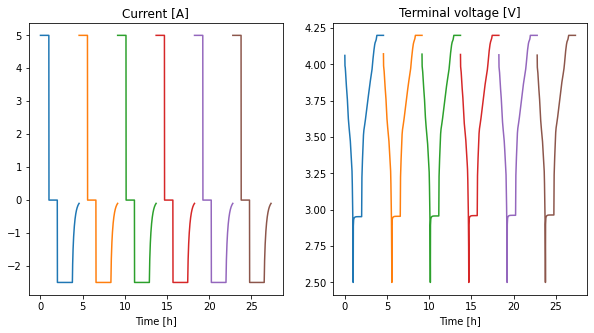

In [ ]:
#sol.plot(["Current [A]", "Terminal voltage [V]"])
fig, ax = plt.subplots(1,2,figsize=(10,5))
for idx, cycle in enumerate(sol.cycles):
    if idx <= 5:
      if cycle is not None:
          t = cycle["Time [h]"].data
          ax[0].plot(t, cycle["Current [A]"].data)
          ax[0].set_xlabel("Time [h]")
          ax[0].set_title("Current [A]")
          ax[1].plot(t, cycle["Terminal voltage [V]"].data)
          ax[1].set_xlabel("Time [h]")
          ax[1].set_title("Terminal voltage [V]")

# Overlap cycles

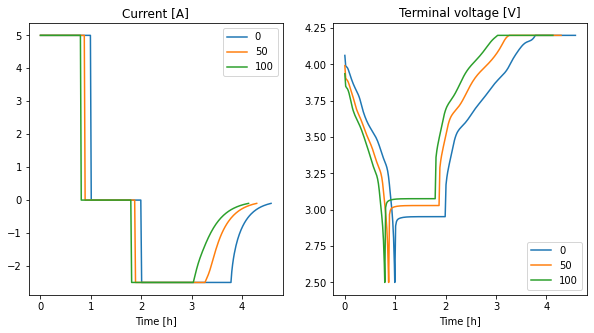

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
for idx, cycle in enumerate(sol.cycles):
    if idx % 50 == 0:
      if cycle is not None:
          t = cycle["Time [h]"].data - cycle["Time [h]"].data[0]
          ax[0].plot(t, cycle["Current [A]"].data)
          ax[0].set_xlabel("Time [h]")
          ax[0].set_title("Current [A]")
          ax[1].plot(t, cycle["Terminal voltage [V]"].data)
          ax[1].set_xlabel("Time [h]")
          ax[1].set_title("Terminal voltage [V]")
ax[0].legend([*range(0, len(sol.cycles),50)])
ax[1].legend([*range(0, len(sol.cycles),50)])

# Plot loss of lithium to SEI as a function of time and voltage

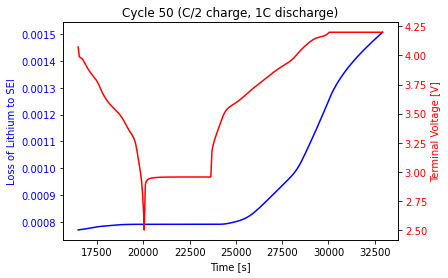

In [ ]:
ncycle_sel = 1 # Choose cycle number to plot


fig1, ax1 = plt.subplots()
t1 = sol.cycles[ncycle_sel]["Time [s]"].data
ax1.plot(t1, sol.cycles[ncycle_sel]["Loss of lithium to SEI [mol]"].data, 'blue', label="Li loss (C/2 charge, 1C discharge)")
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Loss of Lithium to SEI", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

axx = ax1.twinx()
axx.plot(t1,sol.cycles[ncycle_sel]["Terminal voltage [V]"].data, color='red', label="Voltage (C/2 charge, 1C discharge)")
axx.tick_params(axis='y', labelcolor='red')
axx.set_ylabel('Terminal Voltage [V]', color='red')

ax1.set_title("Cycle 50 (C/2 charge, 1C discharge)")

plt.show()

plt.rcParams.update({'font.size': 12})

# Plot additional quantities

Set up a function that calculates capacity using PyBamm built-in function 'ElectrodeSOH'

In [ ]:
esoh_model = pybamm.lithium_ion.ElectrodeSOH()
esoh_sim = pybamm.Simulation(
    esoh_model, parameter_values=parameter_values
    )

def get_cycle_summary_variables(cycle_solution, esoh_sim):
    Q = np.array([])
    for ii in range(len(cycle_solution)):
        Q = np.concatenate(
            [Q, cycle_solution[ii]["Discharge capacity [A.h]"].data], 
            )
        min_Q = np.min(Q)
        max_Q = np.max(Q)
        
    cycle_summary_variables = pybamm.FuzzyDict(
        {
            "Minimum measured discharge capacity [A.h]": min_Q,
            "Maximum measured discharge capacity [A.h]": max_Q,
            "Measured capacity [A.h]": max_Q - min_Q,
        }
    )

    return cycle_summary_variables

Set up a function that calculates capacity using: 1) 'ElectrodeSOH' function (defined above), 2) Columb counting.

In [ ]:
def capacity_calculation(sol, i_chg, i_dischg):
    # Charge/discharge capacity/time initialization
    cap_chg_meas = []
    cap_dischg_meas = []

    # cycle number
    icycle = sol.summary_variables["Cycle number"]
    ncycle = len(icycle)

    for ii in range(ncycle):
        
        x_chg = sol.cycles[ii].steps[i_chg[0]:i_chg[1]]
        x_dischg = sol.cycles[ii].steps[i_dischg[0]:i_dischg[1]]
        
        x_chg_sum = get_cycle_summary_variables(x_chg, esoh_sim)
        x_dischg_sum = get_cycle_summary_variables(x_dischg, esoh_sim)

        # Capacity measured from experiment data
        cap_chg_meas.append(x_chg_sum["Measured capacity [A.h]"])
        cap_dischg_meas.append(x_dischg_sum["Measured capacity [A.h]"])


    return icycle, cap_chg_meas, cap_dischg_meas

Compute capacity

In [ ]:
# Indentify the steps from the experiment
i_dischg = [0,1]
i_chg = [2,4]

# Compute charge and discharge capacity
icycle1, cap_chg_meas1, cap_dischg_meas1 = capacity_calculation(sol, i_chg, i_dischg)

max_capacity = cap_chg_meas1[0]

cap_chg_meas1 = cap_chg_meas1/max_capacity
cap_dischg_meas1 = cap_dischg_meas1/max_capacity

Plot capacity curves

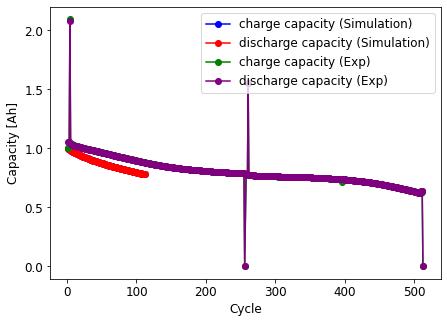

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(7,5)
ax.plot(icycle1, cap_chg_meas1, linestyle='-', marker='o', color='blue', label='charge capacity (Simulation)')
ax.plot(icycle1, cap_dischg_meas1, linestyle='-', marker='o', color='red', label='discharge capacity (Simulation)')
ax.plot(df_exp["Cycle_Index"], df_exp["Charge_Capacity (Ah)"]/df_exp["Charge_Capacity (Ah)"].iloc[0], linestyle='-', marker='o', color='green', label='charge capacity (Exp)')
ax.plot(df_exp["Cycle_Index"], df_exp["Discharge_Capacity (Ah)"]/df_exp["Charge_Capacity (Ah)"].iloc[0], linestyle='-', marker='o', color='purple', label='discharge capacity (Exp)')
ax.set_xlabel("Cycle")
ax.set_ylabel("Capacity [Ah]")
ax.legend()
plt.show()